# Section 3 - Kernel Density Estimation (KDE) and Least Squares
You should have downloaded:
- wings.csv
- housing.csv

# 1 KDE
## 1.1 Intro and Data
The following exercise is based on Tarn Duong, ["An Introduction to Kernel Density Estimation."](https://www.mvstat.net/tduong/research/seminars/seminar-2001-05/) 

**Task**:
Run the code in the next cell, which loads a sample of the log wingspans of aircraft built from 1956 to 1984 (original wingspans were in meters). 
- Assume the data are sampled from a continuous distribution with a **bimodal** density, where the peaks in the density represent the modal log wingspans of small and large aircraft respectively.

In [25]:
import numpy as np
wings = np.loadtxt('wings.csv', delimiter=',')
print(wings)

[2.05 2.2  2.35 2.4  2.45 2.6  2.65 2.7  3.35 3.4  3.6  3.9 ]


## 1.2 Density estimation via histograms
Histograms are dependent on bin width as well as bin boundaries. 

Varying either of these can obscure features of the distribution from which a sample is drawn. We may gain or lose the appearance of bimodality.
    
**Task:**
On separate figures:
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.00, 1.50).
- Plot a histogram of the data using bins of width 0.50, where the first bin is [1.25, 1.75).

3.9
2.05
[1.  1.5 2.  2.5 3.  3.5 4. ]
[0 0 5 3 2 2]


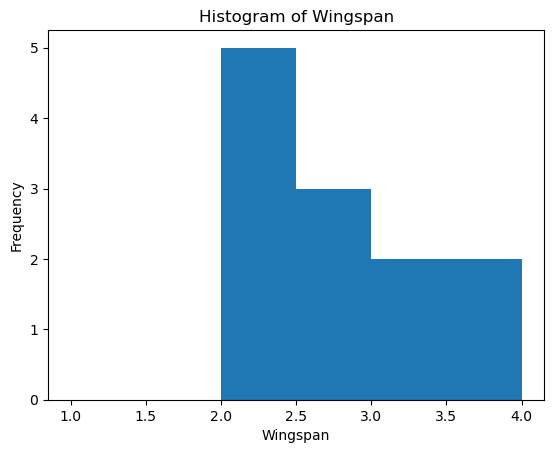

[1.25 1.75 2.25 2.75 3.25 3.75 4.25]
[0 2 6 0 3 1]


<BarContainer object of 6 artists>

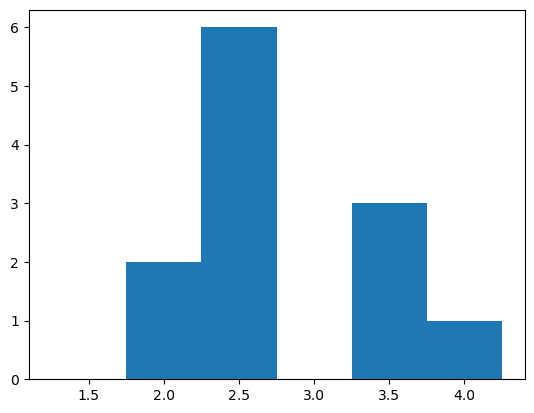

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate histogram values
hist_values, bin_edges = np.histogram(wings, bins=np.arange(1, np.max(wings)+.6, 0.50))
print(np.max(wings))
print(np.min(wings))

# bin edges have to match hist_values
print(bin_edges)
print(hist_values)

# Plot histogram
plt.bar(bin_edges[:-1], hist_values, width=0.50, align='edge')

# Set x-axis label and title
plt.xlabel('Wingspan')
plt.ylabel('Frequency')
plt.title('Histogram of Wingspan')

# Show the plot
plt.show()

hist_values2, bin_edges2 = np.histogram(wings, bins=np.arange(1.25, np.max(wings)+.6, 0.50))

print(bin_edges2)
print(hist_values2)

plt.bar(bin_edges2[:-1], hist_values2, width=0.50, align='edge')


### How does kernel density estimation work? 
- Read [Wikipedia: Kernel density estimation - Definition](https://en.wikipedia.org/wiki/Kernel_density_estimation#Definition)
- A useful formula for the estimate of the density is $$\hat{f_h}(x) = \frac{1}{nh} \sum_{i=1}^n K(\frac{x-x_i}{h}),$$ where $h$ is the bandwidth and $K(\cdot)$ is the kernel function. 
- Advantage of kernel density estimation: it does not depend on bin boundaries. It does however depend on bandwidth, which is an analogue of bin width.

## 1.3 Density estimation via KDE (Uniform kernel)
**Task:**
- Write a function `ukde`, which returns a uniform kernel density estimate given:
    - a vector of points on the x-axis `x` (the axis of the density)
    - a vector of data `data` and 
    - a bandwidth `h`. 
Your kernel function $K$ should be the density function of the uniform distribution on $[-1,1]$.
- Plot the KDE with uniform kernel for x in the range [1,5]
    - Find a bandwidth `bw` that makes bimodality apparent and plot the results. State where the two modes appear to be.
- Check that the density estimate integrates to 1 (closer to 1 if number of point on x-axis goes to infinity).

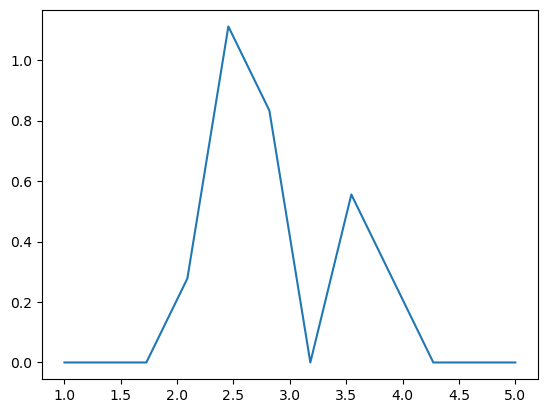

area under KDE: 1.1111111111111114


In [93]:
import scipy.stats as stat

# x: Points at which to evaluate the density estimate.
# data: Points on which to base the density estimate.
# h: Bandwidth.
# xi is the data points within our data
def ukde(x, data, h):
	n = len(data)
	f = np.zeros(len(x))
	for j in range(len(x)):
		f[j] = np.sum(stat.uniform.pdf((x[j] - data) / h) / (n*h))	
	# print(x)
	# print(data)
	# print(f)
	return f

# Plot.
# x is the point on the x-axis where we want to evaluate the density estimate.
x = np.linspace(1, 5, len(wings))
bw = 0.3
plt.plot(x, ukde(x, wings, bw))
plt.show()

# Check that the density estimate integrates to 1
print('area under KDE:', np.trapz(ukde(x, wings, bw), x))

# 1.4 Density estimation via KDE (Gaussian kernel)

Now, instead of uniform kernels, try Gaussian (i.e., normal distribution) kernels. 
- Advantage of Gaussian kernels over uniform kernels: smoother estimated density curve.

**Task:**
- Write function `gkde` that returns a Gaussian kernel density estimate given:
    - a vector of points on the x-axis `x` (the axis of the density)
    - a vector of data `data` and 
    - a bandwidth `h`. 
Your kernel function $K$ should be the density function of the standard normal distribution.
- Plot the KDE with Gaussian kernel for x in the range [1,5]
    - Find a bandwidth `bw` that makes bimodality apparent and plot the results. State where the two modes appear to be.
- Check that the density estimate integrates to 1 (closer to 1 if number of point on x-axis goes to infinity).

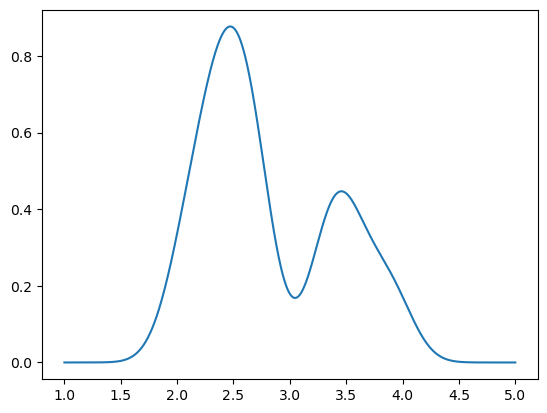

area under KDE: 0.999999991989224


In [96]:
# Gaussian kernel density estimation.
def gkde(x, data, h):
        n = len(data)
        f = np.zeros(len(x))
        for j in range(len(x)):
                f[j] = np.sum(stat.norm.pdf((x[j] - data) / h) / (n*h))
        return f

#2 Plot
x = np.linspace(1, 5, 1000)
bw = .2
plt.plot(x, gkde(x, wings, bw))
plt.show()

# Check that the density estimate integrates to 1.
print('area under KDE:', np.trapz(gkde(x, wings, bw), x))


# 2 Least Squares
Let's learn to use the sklearn package for least squares linear regression.
## 2.1 Load data

In [85]:
######## DO NOT CHANGE THIS CODE ##########
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv("housing.csv")

# extract price and lotsize columns as np arrays
X, y =  np.array(df['lotsize']), np.array(df['price'])

# print the shapes of X and Y
print(X.shape); print(y.shape)
###########################################

(546,)
(546,)


## 2.2 Split data into training and testing
**Task:** 
1. Create new numpy column arrays called `X_train, X_test, y_train, y_test`, where:
    - you use train_test_split() function from sklearn.model_selection
    - the training dataset contains the 70% of samples
    - the testing dataset contains the 30% of samples
    - random state set to 0.
2. Check the dimensions/size of each array and make sure the train-test split is doing what its expected to do. 
3. Discuss: what other code can you write to verify that the split is indeed randomized and not the original ordering of the given dataset?


In [86]:
# TODO split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=0)

print('X_train: ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test : ', y_test.shape)

X_train:  (382,)
X_test :  (164,)
y_train:  (382,)
y_test :  (164,)


## 2.3 Perform linear regression
Suppose we model housing price $Y$ by the variable $X$ lot size using the linear model
$$
Y = aX+b,
$$
where $a$ and $b$ are coefficients to be determined.

**Task:** By looking at the documentation for sklearn.linear_model.LinearRegresson, learn how to:
- create a LinearRegression() object/model,
- fit the model to the training data (You may need to reshape the data to column arrays by array.reshape(-1,1)),
- extract coefficients $a$ and $b$, and then print them.

In [80]:
from sklearn.linear_model import LinearRegression

# TODO sklearn linear regression model and fit data
reg = LinearRegression().fit(X_train.reshape(-1,1), y_train)


# TODO extract coefficients
a = reg.coef_
b = reg.intercept_

# TODO print coefficients
print('a = ', a)
print('b = ', b)

a =  [7.44691016]
b =  29363.804930288585
